In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_all_data
from prepare import prep_store_data

# Aquire and Prep Data

- Use functions from exercises to quickly acquire and prep data.

- I added a line to the acquire that drops all of the unnecessary columns.

In [2]:
df = prep_store_data(get_all_data())

In [3]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tue,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,01-Jan,2-Tue,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,25.16


# Split the Data

- Test sample must follow train data (in time) and cannot overlap the data that trained the model it will be used to test.

- Test sample must be in a continuous interval to maintain the aspect of the data being 'time-series'. Each point is not in isolation,

- Test sample will ideally follow the training data with a time gap between the two samples. 30 days is a standard recommended gap.

- TimeSeriesSplit provides train/test split indices to split time series data samples that are observed at fixed time intervals. 

    - In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.
    
    - The cross-validation object is a variation of KFold. In the Kth split, it returns first k folds as train set and the (k+1)th fold as test set.
    
    - successive training sets are supersets of those that come before them.

## aggregate to the daily level

In [14]:
df2 = df['sale_amount'].resample('D').sum().reset_index()

In [16]:
df2.head()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0


In [17]:
# removed the unique items/brands and 
# summing totals from each of 1826 days

df2.shape

(1826, 2)

## Set X and y
- set sale_amount to y, set sale_date to X


In [18]:
X = df2.sale_date
y = df2.sale_amount

## Create the Object

In [19]:
tss = TimeSeriesSplit(n_splits=5, max_train_size=None)

## Fit to the Data/Transform the Data

- generate the indices for the splits using tss.split(X)

In [20]:
train_indices = []
test_indices = []

for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_indices.append(train_index)
    test_indices.append(test_index)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [25]:
#train_indices

In [24]:
#test_indices

### Plot Each Set Created in the Split

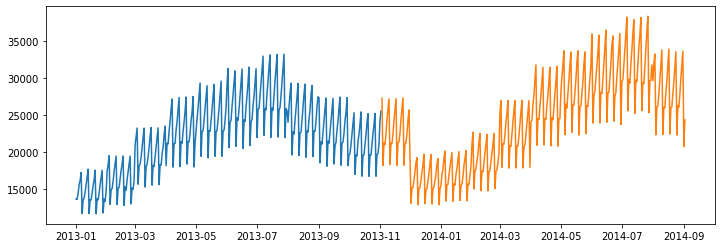

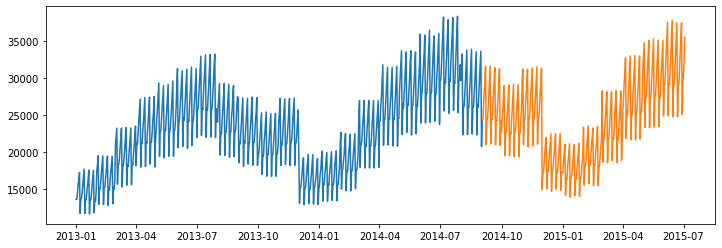

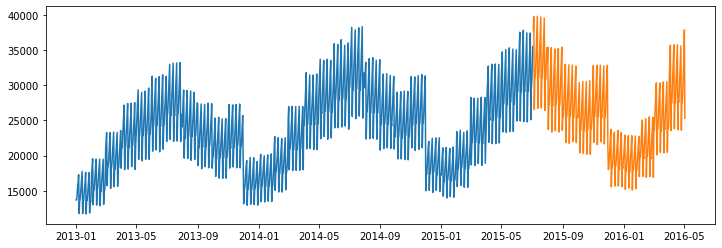

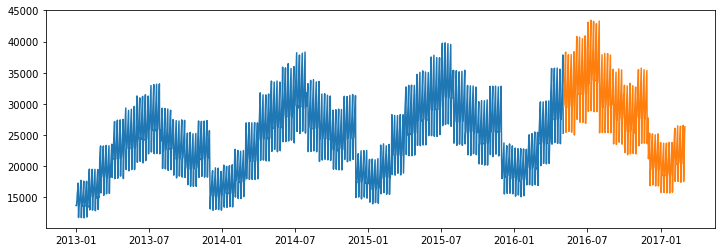

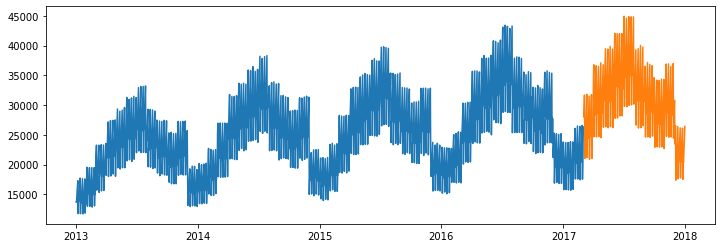

In [23]:
for i in range(0,5):
    plt.figure(figsize = (12,4))
    plt.plot(X_train[train_indices[i]], y_train[train_indices[i]])
    plt.plot(X[test_indices[i]], y[test_indices[i]])

### Percentages for Train and Test Split

In [27]:
for i in range(0,5):
    print(len(train_indices[i]))
    print(len(test_indices[i]))
    print(len(test_indices[i]) / (len(test_indices[i]) + len(train_indices[i])))

306
304
0.49836065573770494
610
304
0.33260393873085337
914
304
0.24958949096880131
1218
304
0.19973718791064388
1522
304
0.1664841182913472


# Validate Train and Test Sets

In [28]:
# train sets should ends one day prior to the test sets

print(X_train.tail())
print(X_test.head())
print(X_test.tail())

1517   2017-02-26 00:00:00+00:00
1518   2017-02-27 00:00:00+00:00
1519   2017-02-28 00:00:00+00:00
1520   2017-03-01 00:00:00+00:00
1521   2017-03-02 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]
1522   2017-03-03 00:00:00+00:00
1523   2017-03-04 00:00:00+00:00
1524   2017-03-05 00:00:00+00:00
1525   2017-03-06 00:00:00+00:00
1526   2017-03-07 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]
1821   2017-12-27 00:00:00+00:00
1822   2017-12-28 00:00:00+00:00
1823   2017-12-29 00:00:00+00:00
1824   2017-12-30 00:00:00+00:00
1825   2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]


## Plot Train and Test Sets

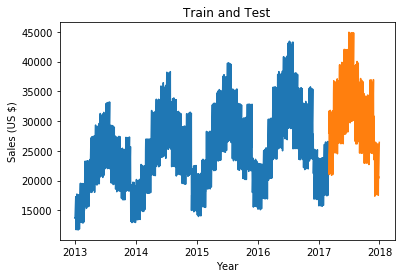

In [29]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)

plt.title('Train and Test')
plt.xlabel('Year')
plt.ylabel('Sales (US $)')
plt.show()

# Plot Weekly & 7-day Moving Averages

- Compare the 2 plots.

- Notice how the shape doesn't change, only the y-axis values.

## Recombine X_ and y_train sets into DF

In [30]:
train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

## Set_index back to sale_date

In [31]:
train = train.set_index('sale_date')

## Plots

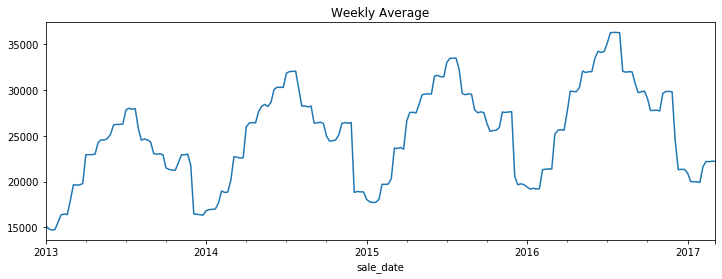

In [32]:
train.sale_amount.resample('W').mean().plot(figsize=(12,4))

plt.title('Weekly Average')
plt.show()

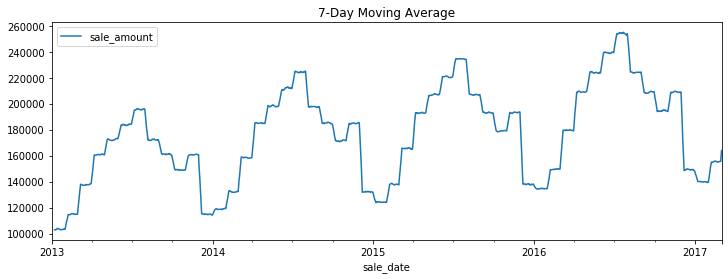

In [33]:
train.rolling(7).sum().plot(figsize=(12,4))

plt.title('7-Day Moving Average')
plt.show()

## Plot the daily difference

- Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

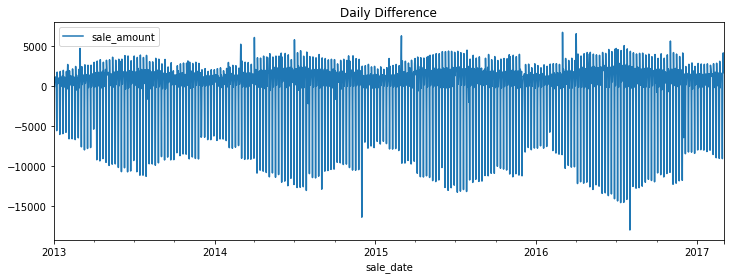

In [34]:
train.resample('D').mean().diff(periods=1).plot(figsize=(12,4))

plt.title('Daily Difference')
plt.show()

In [44]:
train.diff(periods=1).min()

sale_amount   -17943.0
dtype: float64

In [45]:
train.diff(periods=1).idxmin()

sale_amount   2016-08-01 00:00:00+00:00
dtype: datetime64[ns, GMT]

## Plot a Time Series Decomposition

- This seasonality is at the highest level.

    - It is plotting differences.

- We cannot see the weekly seasonality here.

- Residual plotting what cannot be accounted for by seasonality or trend.

    - It starts when there is a trend, when there is enough data.

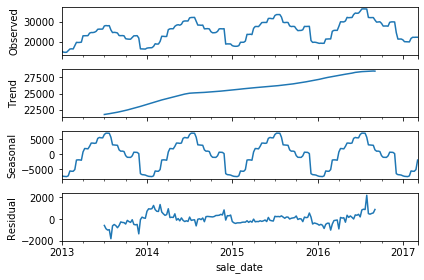

In [47]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean(), model='additive')

fig = decomposition.plot()

plt.show()

## Create a Lag Plot 

- day over day

- We are looking at today and tomorrow and seeing how they compare.

    - Is today related in any way to tomorrow?
    


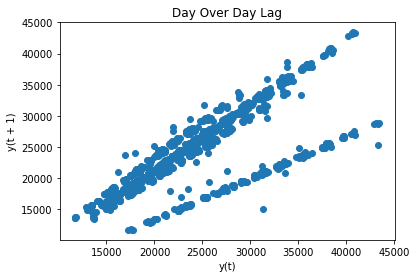

In [49]:
pd.plotting.lag_plot(train.resample('D').mean(), lag=1)

plt.title('Day Over Day Lag')
plt.show()

# Lag Correlation

- The t-1, yesterday, is directly correlated with yesterday, tomorrow with tomorrow.

- Tomorrow can be explained 75% by yesterday and vice versa.

In [50]:
df_corr = pd.concat([train.shift(1), train], axis=1)
df_corr.columns = ['t-1','t+1']
result = df_corr.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.749048
t+1  0.749048  1.000000


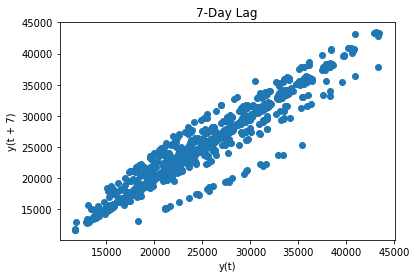

In [53]:
pd.plotting.lag_plot(train.resample('D').mean(), lag=7)

plt.title('7-Day Lag')
plt.show()

# Acquire OPS data

- Using your OPS data you prepped in lesson 2 exercises:

In [71]:
df = pd.read_csv('opsd.csv')

# Split Data

- Split your data into train and test using the percent cutoff method.


In [81]:
df.shape

(4383, 5)

In [82]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [83]:
df['Date'] = pd.to_datetime(df['Date'])

In [100]:
df = df.set_index('Date').resample('D').sum()

In [101]:
train_size = int(len(df) * .70)

In [102]:
df[:train_size].tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-05-22,1459.234,112.809,185.338,298.147
2014-05-23,1429.832,56.471,119.220,175.691
2014-05-24,1199.258,32.656,140.007,172.663
2014-05-25,1089.246,34.690,193.159,227.849
2014-05-26,1429.811,138.365,137.176,275.541


# Validate Split

In [103]:
train, test = df[:train_size], df[train_size:]

In [104]:
len(train), len(test)

(3068, 1315)

In [105]:
len(train) / (len(train) + len(test))

0.6999771845767739

# Plot

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3068 entries, 2006-01-01 to 2014-05-26
Freq: D
Data columns (total 4 columns):
Consumption    3068 non-null float64
Wind           3068 non-null float64
Solar          3068 non-null float64
Wind+Solar     3068 non-null float64
dtypes: float64(4)
memory usage: 119.8 KB


## Plot Weekly & 7-day Moving Averages

- Compare the 2 plots.


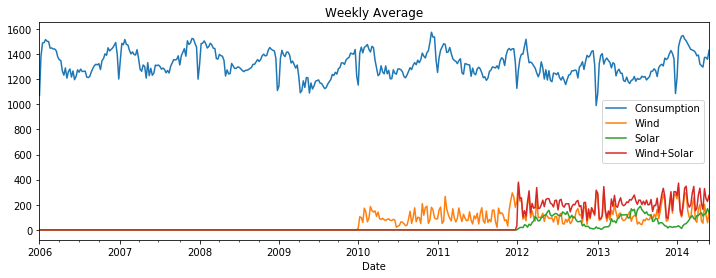

In [108]:
train.resample('W').mean().plot(figsize=(12,4))

plt.title('Weekly Average')
plt.show()

## Plot Daily Difference

- Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

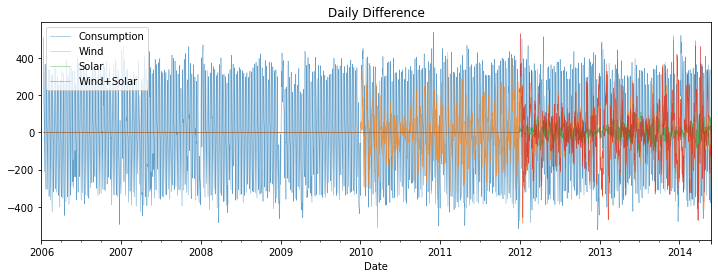

In [112]:
train.diff(periods=10).plot(figsize=(12,4), alpha=0.7, linewidth=.5)

plt.title('Daily Difference')
plt.show()

## Series Decomposition

- Takeaways?


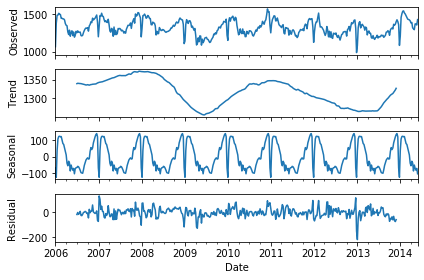

In [115]:
decomposition = sm.tsa.seasonal_decompose(train.Consumption.resample('W').mean(), model='additive')

fig = decomposition.plot()

plt.show()